# 第8章: ニューラルネット
https://nlp100.github.io/ja/ch08.html

第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ．

## 70. 単語ベクトルの和による特徴量
問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例$x_i$の特徴ベクトル$x_i$を並べた行列$X$と，正解ラベルを並べた行列（ベクトル）$Y$を作成したい．
$$
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}
$$

ここで，$n$は学習データの事例数であり，$\boldsymbol{x}_i \in \mathbb{R}^d$と$y_i \in \mathbb{N}$はそれぞれ，$i \in \{1, \dots, n\}$番目の事例の特徴量ベクトルと正解ラベルを表す． なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．$\mathbb{N}_{<4}$で4未満の自然数（0を含む）を表すことにすれば，任意の事例の正解ラベル$y_i$は$y_i \in \mathbb{N}_{<4}$で表現できる． 以降では，ラベルの種類数を$L$で表す（今回の分類タスクでは$L$=4である）．

$i$番目の事例の特徴ベクトル$\boldsymbol{x}_i$は，次式で求める．
$$
\boldsymbol{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})
$$

ここで，$i$番目の事例は$T_i$個の（記事見出しの）単語列$(w_{i,1}, w_{i,2}, \dots, w_{i,T_i})$から構成され，$\mathrm{emb}(w) \in \mathbb{R}^d$は単語$w$に対応する単語ベクトル（次元数は$d$）である．すなわち，$i$番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが$x_i$である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．300次元の単語ベクトルを用いたので，$d=300$である．

$i$番目の事例のラベル$y_i$は，次のように定義する．

$$
y_i = \begin{cases}
0 & (記事x_iが「ビジネス」カテゴリの場合) \\
1 & (記事x_iが「科学技術」カテゴリの場合) \\
2 & (記事x_iが「エンターテイメント」カテゴリの場合) \\
3 & (記事x_iが「健康」カテゴリの場合) \\
\end{cases}
$$

なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

- 学習データの特徴量行列: $X_{\rm train} \in \mathbb{R}^{N_t \times d}$
- 学習データのラベルベクトル: $Y_{\rm train} \in \mathbb{N}^{N_t}$
- 検証データの特徴量行列: $X_{\rm valid} \in \mathbb{R}^{N_v \times d}$
- 検証データのラベルベクトル: $Y_{\rm valid} \in \mathbb{N}^{N_v}$
- 評価データの特徴量行列: $X_{\rm test} \in \mathbb{R}^{N_e \times d}$
- 評価データのラベルベクトル: $Y_{\rm test} \in \mathbb{N}^{N_e}$

なお，$N_t, N_v, N_e$はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．

In [3]:
import pandas as pd
import torch
import texthero as hero
from gensim.models import KeyedVectors

category_dict = {
    'b': 0,
    't': 1,
    'e': 2,
    'm': 3,
}

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

def vectorize(sentense):
    words = sentense.split()
    vector_list = [model[word] for word in words if word in model]
    return sum(vector_list) / len(vector_list)

def get_feature_and_label(txt_path):
    df = pd.read_table(txt_path, header=None, names=['category', 'title'])
    df['title'] = hero.clean(df['title'])
    df['feature'] = df['title'].map(lambda x: vectorize(x))
    df['label'] = df['category'].map(category_dict)
    return torch.tensor(df['feature']), torch.from_numpy(df['label'].values).long()

X_train, y_train = get_feature_and_label('train.txt')
X_valid, y_valid = get_feature_and_label('valid.txt')
X_test, y_test = get_feature_and_label('test.txt')
torch.save(X_train, 'train.feature.pth'), torch.save(y_train, 'train.label.pth')
torch.save(X_valid, 'valid.feature.pth'), torch.save(y_valid, 'valid.label.pth')
torch.save(X_test, 'test.feature.pth'), torch.save(y_test, 'test.label.pth')

# X_train, y_train = torch.load('train.feature.pth'), torch.load('train.label.pth')
# X_valid, y_valid = torch.load('valid.feature.pth'), torch.load('valid.label.pth')
# X_test, y_test = torch.load('test.feature.pth'), torch.load('test.label.pth')

/tmp/ipykernel_17896/943271579.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/torch/csrc/utils/tensor_new.cpp:210.)
  return torch.tensor(df['feature']), torch.from_numpy(df['label'].values).long()


(None, None)

## 71. 単層ニューラルネットワークによる予測
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．
$$
\hat{\boldsymbol{y}}_1 = {\rm softmax}(\boldsymbol{x}_1 W), \\
\hat{Y} = {\rm softmax}(X_{[1:4]} W)
$$

ただし，softmaxはソフトマックス関数，$X_{[1:4]} \in \mathbb{R}^{4 \times d}$は特徴ベクトル$x_1,x_2,x_3,x_4$を縦に並べた行列である．

$$
X_{[1:4]} = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \boldsymbol{x}_3 \\ 
  \boldsymbol{x}_4 \\ 
\end{pmatrix}
$$

行列$W \in \mathbb{R}^{d \times L}$は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，$\hat{\boldsymbol{y}}_1 \in \mathbb{R}^L$は未学習の行列$W$で事例$x_1$を分類したときに，各カテゴリに属する確率を表すベクトルである． 同様に，$\hat{Y} \in \mathbb{R}^{n \times L}$は，学習データの事例$x_1,x_2,x_3,x_4$について，各カテゴリに属する確率を行列として表現している．


In [4]:
import torch
import torch.nn as nn

class Linear(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.W = nn.Parameter(
            torch.zeros((in_dim, out_dim)).float()
        )
        nn.init.xavier_normal_(self.W)
        # self.b = nn.Parameter(
        #     torch.zeros(out_dim).float()
        # )
        # nn.init.xavier_normal_(self.b)
    
    def forward(self, x):
        return x@self.W # + self.b

class Model(nn.Module):
    def __init__(self, in_dim=300, out_dim=4):
        super().__init__()
        self.model = nn.Sequential(
            Linear(in_dim=in_dim, out_dim=out_dim),
            nn.ReLU(),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        return self.model(x)

model = Model()

X = X_train[:4]
Y = model(X)
Y

tensor([[0.2603, 0.2453, 0.2491, 0.2453],
        [0.2543, 0.2402, 0.2653, 0.2402],
        [0.2499, 0.2504, 0.2499, 0.2499],
        [0.2668, 0.2444, 0.2444, 0.2444]], grad_fn=<SoftmaxBackward0>)

## 72. 損失と勾配の計算
学習データの事例$x_1$と事例集合$x_1, x_2, x_3, x_4$に対して，クロスエントロピー損失と，行列$W$に対する勾配を計算せよ．なお，ある事例$x_i$に対して損失は次式で計算される．
$$l_i = - \log [事例x_iがy_iに分類される確率]$$
ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．


In [5]:
def cross_entropy(y, t, num_classes=4):
    t_one_hot = torch.eye(num_classes)[t]
    loss = (-t_one_hot*torch.log(y)).sum(axis=1)
    return loss.mean()

T = y_train[:4]
cross_entropy(Y, T)

tensor(1.3777, grad_fn=<MeanBackward0>)

## 73. 確率的勾配降下法による学習
確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列$W$を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．


In [6]:
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

def train_epoch(model, train_dataloader, optimizer, device):
    model.to(device)
    model.train()
    train_loss = 0
    train_accuracy = 0
    for X, T in train_dataloader:
        X, T = X.to(device), T.to(device)
        Y = model(X)
        loss = cross_entropy(Y, T)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred = Y.argmax(1)
        train_loss += loss.item()*len(X)/len(train_dataloader.dataset)
        train_accuracy += torch.sum(pred == T)/len(train_dataloader.dataset)
    return train_loss, train_accuracy

def valid_epoch(model, valid_dataloader, device):
    model.to(device)
    model.eval()
    valid_loss = 0
    valid_accuracy = 0
    for X, T in valid_dataloader:
        X, T = X.to(device), T.to(device)
        with torch.no_grad():
            Y = model(X)
            loss = cross_entropy(Y, T)
        
        pred = Y.argmax(1)
        valid_loss += loss.item()*len(X)/len(valid_dataloader.dataset)
        valid_accuracy += torch.sum(pred == T)/len(valid_dataloader.dataset)
    return valid_loss, valid_accuracy

In [7]:
device = torch.device('cpu')
model = Model()
num_epochs = 10
batch_size = 64
lr = 1e-1
optimizer = optim.SGD(model.parameters(), lr=lr)

train_dataloader = DataLoader(Dataset(X_train, y_train), batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(Dataset(X_valid, y_valid), batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(Dataset(X_test, y_test), batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device)
    valid_loss, valid_accuracy = valid_epoch(model, valid_dataloader, device)
    print(f'epoch: {epoch+1}, train_loss: {train_loss:.3f}, train_accuracy: {train_accuracy: .3f}. valid_loss: {valid_loss: .3f}, valid_accuracy: {valid_accuracy: .3f}')

epoch: 1, train_loss: 1.074, train_accuracy:  0.698. valid_loss:  0.871, valid_accuracy:  0.762
epoch: 2, train_loss: 0.788, train_accuracy:  0.769. valid_loss:  0.735, valid_accuracy:  0.768
epoch: 3, train_loss: 0.692, train_accuracy:  0.773. valid_loss:  0.664, valid_accuracy:  0.775
epoch: 4, train_loss: 0.635, train_accuracy:  0.782. valid_loss:  0.616, valid_accuracy:  0.782
epoch: 5, train_loss: 0.594, train_accuracy:  0.791. valid_loss:  0.580, valid_accuracy:  0.797
epoch: 6, train_loss: 0.563, train_accuracy:  0.805. valid_loss:  0.551, valid_accuracy:  0.814
epoch: 7, train_loss: 0.539, train_accuracy:  0.819. valid_loss:  0.528, valid_accuracy:  0.826
epoch: 8, train_loss: 0.518, train_accuracy:  0.829. valid_loss:  0.510, valid_accuracy:  0.834
epoch: 9, train_loss: 0.502, train_accuracy:  0.835. valid_loss:  0.494, valid_accuracy:  0.847
epoch: 10, train_loss: 0.487, train_accuracy:  0.841. valid_loss:  0.480, valid_accuracy:  0.850


## 74. 正解率の計測
問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．


In [8]:
_, train_accuracy = valid_epoch(model, train_dataloader, device)
_, test_accuracy = valid_epoch(model, test_dataloader, device)
print(f'train: {train_accuracy}, test: {test_accuracy}')

train: 0.8434216380119324, test: 0.8515742421150208


## 75. 損失と正解率のプロット
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．


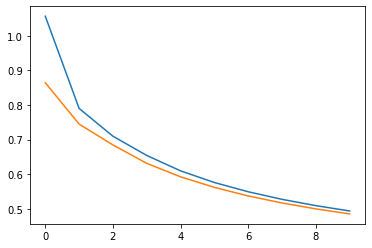

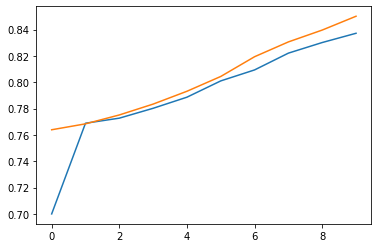

In [9]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

model = Model()
optimizer = optim.SGD(model.parameters(), lr=lr)

losses = []
accuracies = []
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device)
    valid_loss, valid_accuracy = valid_epoch(model, valid_dataloader, device)
    losses += [[train_loss, valid_loss]]
    accuracies += [[train_accuracy, valid_accuracy]]

    plt.plot(losses), plt.show()
    plt.plot(accuracies), plt.show()
    clear_output(wait = True)

## 76. チェックポイント
問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．


In [10]:
def save_model(model, optimizer, save_path):
    state = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
    }
    torch.save(state, save_path)

def load_model(model, optimizer, load_path):
    state = torch.load(load_path)
    model.load_state_dict(state['model'])
    optimizer.load_state_dict(state['optimizer'])

model = Model()
optimizer = optim.SGD(model.parameters(), lr=lr)

losses = []
accuracies = []
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device)
    valid_loss, valid_accuracy = valid_epoch(model, valid_dataloader, device)
    losses += [[train_loss, valid_loss]]
    accuracies += [[train_accuracy, valid_accuracy]]
    
    save_model(model, optimizer, 'last_model.pth')
    break

load_model(model, optimizer, 'last_model.pth')

## 77. ミニバッチ化
問題76のコードを改変し，$B$事例ごとに損失・勾配を計算し，行列$W$の値を更新せよ（ミニバッチ化）．$B$の値を$1, 2, 4, 8, \dots$と変化させながら，1エポックの学習に要する時間を比較せよ．


In [11]:
from time import time
from contextlib import contextmanager

@contextmanager
def timer(description):
    start = time()
    yield
    print(description, ': {:.3f} 秒'.format(time()-start))

In [12]:
batch_size_list = [1, 2, 4, 8, 16, 32, 64]

for batch_size in batch_size_list:
    model = Model()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    train_dataloader = DataLoader(Dataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    with timer(f'batch_size: {batch_size}'):
        train_epoch(model, train_dataloader, optimizer, device)

batch_size: 1 : 8.341 秒
batch_size: 2 : 3.796 秒
batch_size: 4 : 1.888 秒
batch_size: 8 : 1.050 秒
batch_size: 16 : 0.653 秒
batch_size: 32 : 0.343 秒
batch_size: 64 : 0.301 秒


## 78. GPU上での学習
問題77のコードを改変し，GPU上で学習を実行せよ．


In [13]:
batch_size_list = [1, 2, 4, 8, 16, 32, 64]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for batch_size in batch_size_list:
    model = Model().to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    train_dataloader = DataLoader(Dataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    with timer(f'batch_size: {batch_size}'):
        train_epoch(model, train_dataloader, optimizer, device)

batch_size: 1 : 7.663 秒
batch_size: 2 : 3.581 秒
batch_size: 4 : 1.852 秒
batch_size: 8 : 1.012 秒
batch_size: 16 : 0.572 秒
batch_size: 32 : 0.324 秒
batch_size: 64 : 0.203 秒


## 79. 多層ニューラルネットワーク
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．

In [14]:
class Linear(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.W = nn.Parameter(
            torch.zeros((in_dim, out_dim)).float()
        )
        nn.init.xavier_normal_(self.W)
        self.b = nn.Parameter(
            torch.zeros(out_dim).float()
        )
    
    def forward(self, x):
        return x@self.W + self.b

class Model(nn.Module):
    def __init__(self, in_dim=300, hidden_dim=256, out_dim=4):
        super().__init__()
        self.model = nn.Sequential(
            Linear(in_dim=in_dim, out_dim=hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            Linear(in_dim=hidden_dim, out_dim=hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            Linear(in_dim=hidden_dim, out_dim=out_dim),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        return self.model(x)

In [15]:
num_epochs = 10
model = Model()
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device)
    valid_loss, valid_accuracy = valid_epoch(model, valid_dataloader, device)
    print(f'epoch: {epoch+1}, train_loss: {train_loss:.3f}, train_accuracy: {train_accuracy: .3f}. valid_loss: {valid_loss: .3f}, valid_accuracy: {valid_accuracy: .3f}')


epoch: 1, train_loss: 0.417, train_accuracy:  0.851. valid_loss:  0.334, valid_accuracy:  0.879
epoch: 2, train_loss: 0.241, train_accuracy:  0.919. valid_loss:  0.302, valid_accuracy:  0.889
epoch: 3, train_loss: 0.167, train_accuracy:  0.946. valid_loss:  0.311, valid_accuracy:  0.898
epoch: 4, train_loss: 0.113, train_accuracy:  0.965. valid_loss:  0.312, valid_accuracy:  0.896
epoch: 5, train_loss: 0.078, train_accuracy:  0.979. valid_loss:  0.325, valid_accuracy:  0.897
epoch: 6, train_loss: 0.053, train_accuracy:  0.988. valid_loss:  0.334, valid_accuracy:  0.909
epoch: 7, train_loss: 0.033, train_accuracy:  0.993. valid_loss:  0.341, valid_accuracy:  0.906
epoch: 8, train_loss: 0.026, train_accuracy:  0.996. valid_loss:  0.352, valid_accuracy:  0.901
epoch: 9, train_loss: 0.022, train_accuracy:  0.998. valid_loss:  0.358, valid_accuracy:  0.903
epoch: 10, train_loss: 0.018, train_accuracy:  0.998. valid_loss:  0.355, valid_accuracy:  0.909
